In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
cuda_df = pd.read_csv("../data/cuda_experiments.csv")
cpu_df = pd.read_csv("../data/cpu_experiments.csv")

In [11]:
arraySize = np.array(cuda_df['arraySize'].unique())

In [13]:
cuda_time = np.zeros((len(arraySize)))
cpu_time = np.zeros((len(arraySize)))
cuda_time_std = np.zeros((len(arraySize)))
cpu_time_std = np.zeros((len(arraySize)))

for i in range(len(arraySize)):
    cuda_time[i] = cuda_df[cuda_df['arraySize']==arraySize[i]]['time'].mean()
    cpu_time[i] = cpu_df[cpu_df['arraySize']==arraySize[i]]['time'].mean()
    cuda_time_std[i] = cuda_df[cuda_df['arraySize']==arraySize[i]]['time'].std()
    cpu_time_std[i] = cpu_df[cpu_df['arraySize']==arraySize[i]]['time'].std()

In [26]:
su = np.zeros((len(arraySize)))
su_std = np.zeros((len(arraySize)))

for i in range(len(arraySize)):
    su[i] = cpu_time[i] / cuda_time[i]
    su_std[i] = (cpu_time[i] * cuda_time_std[i] + cpu_time_std[i] * cuda_time[i]) / cuda_time[i]**2

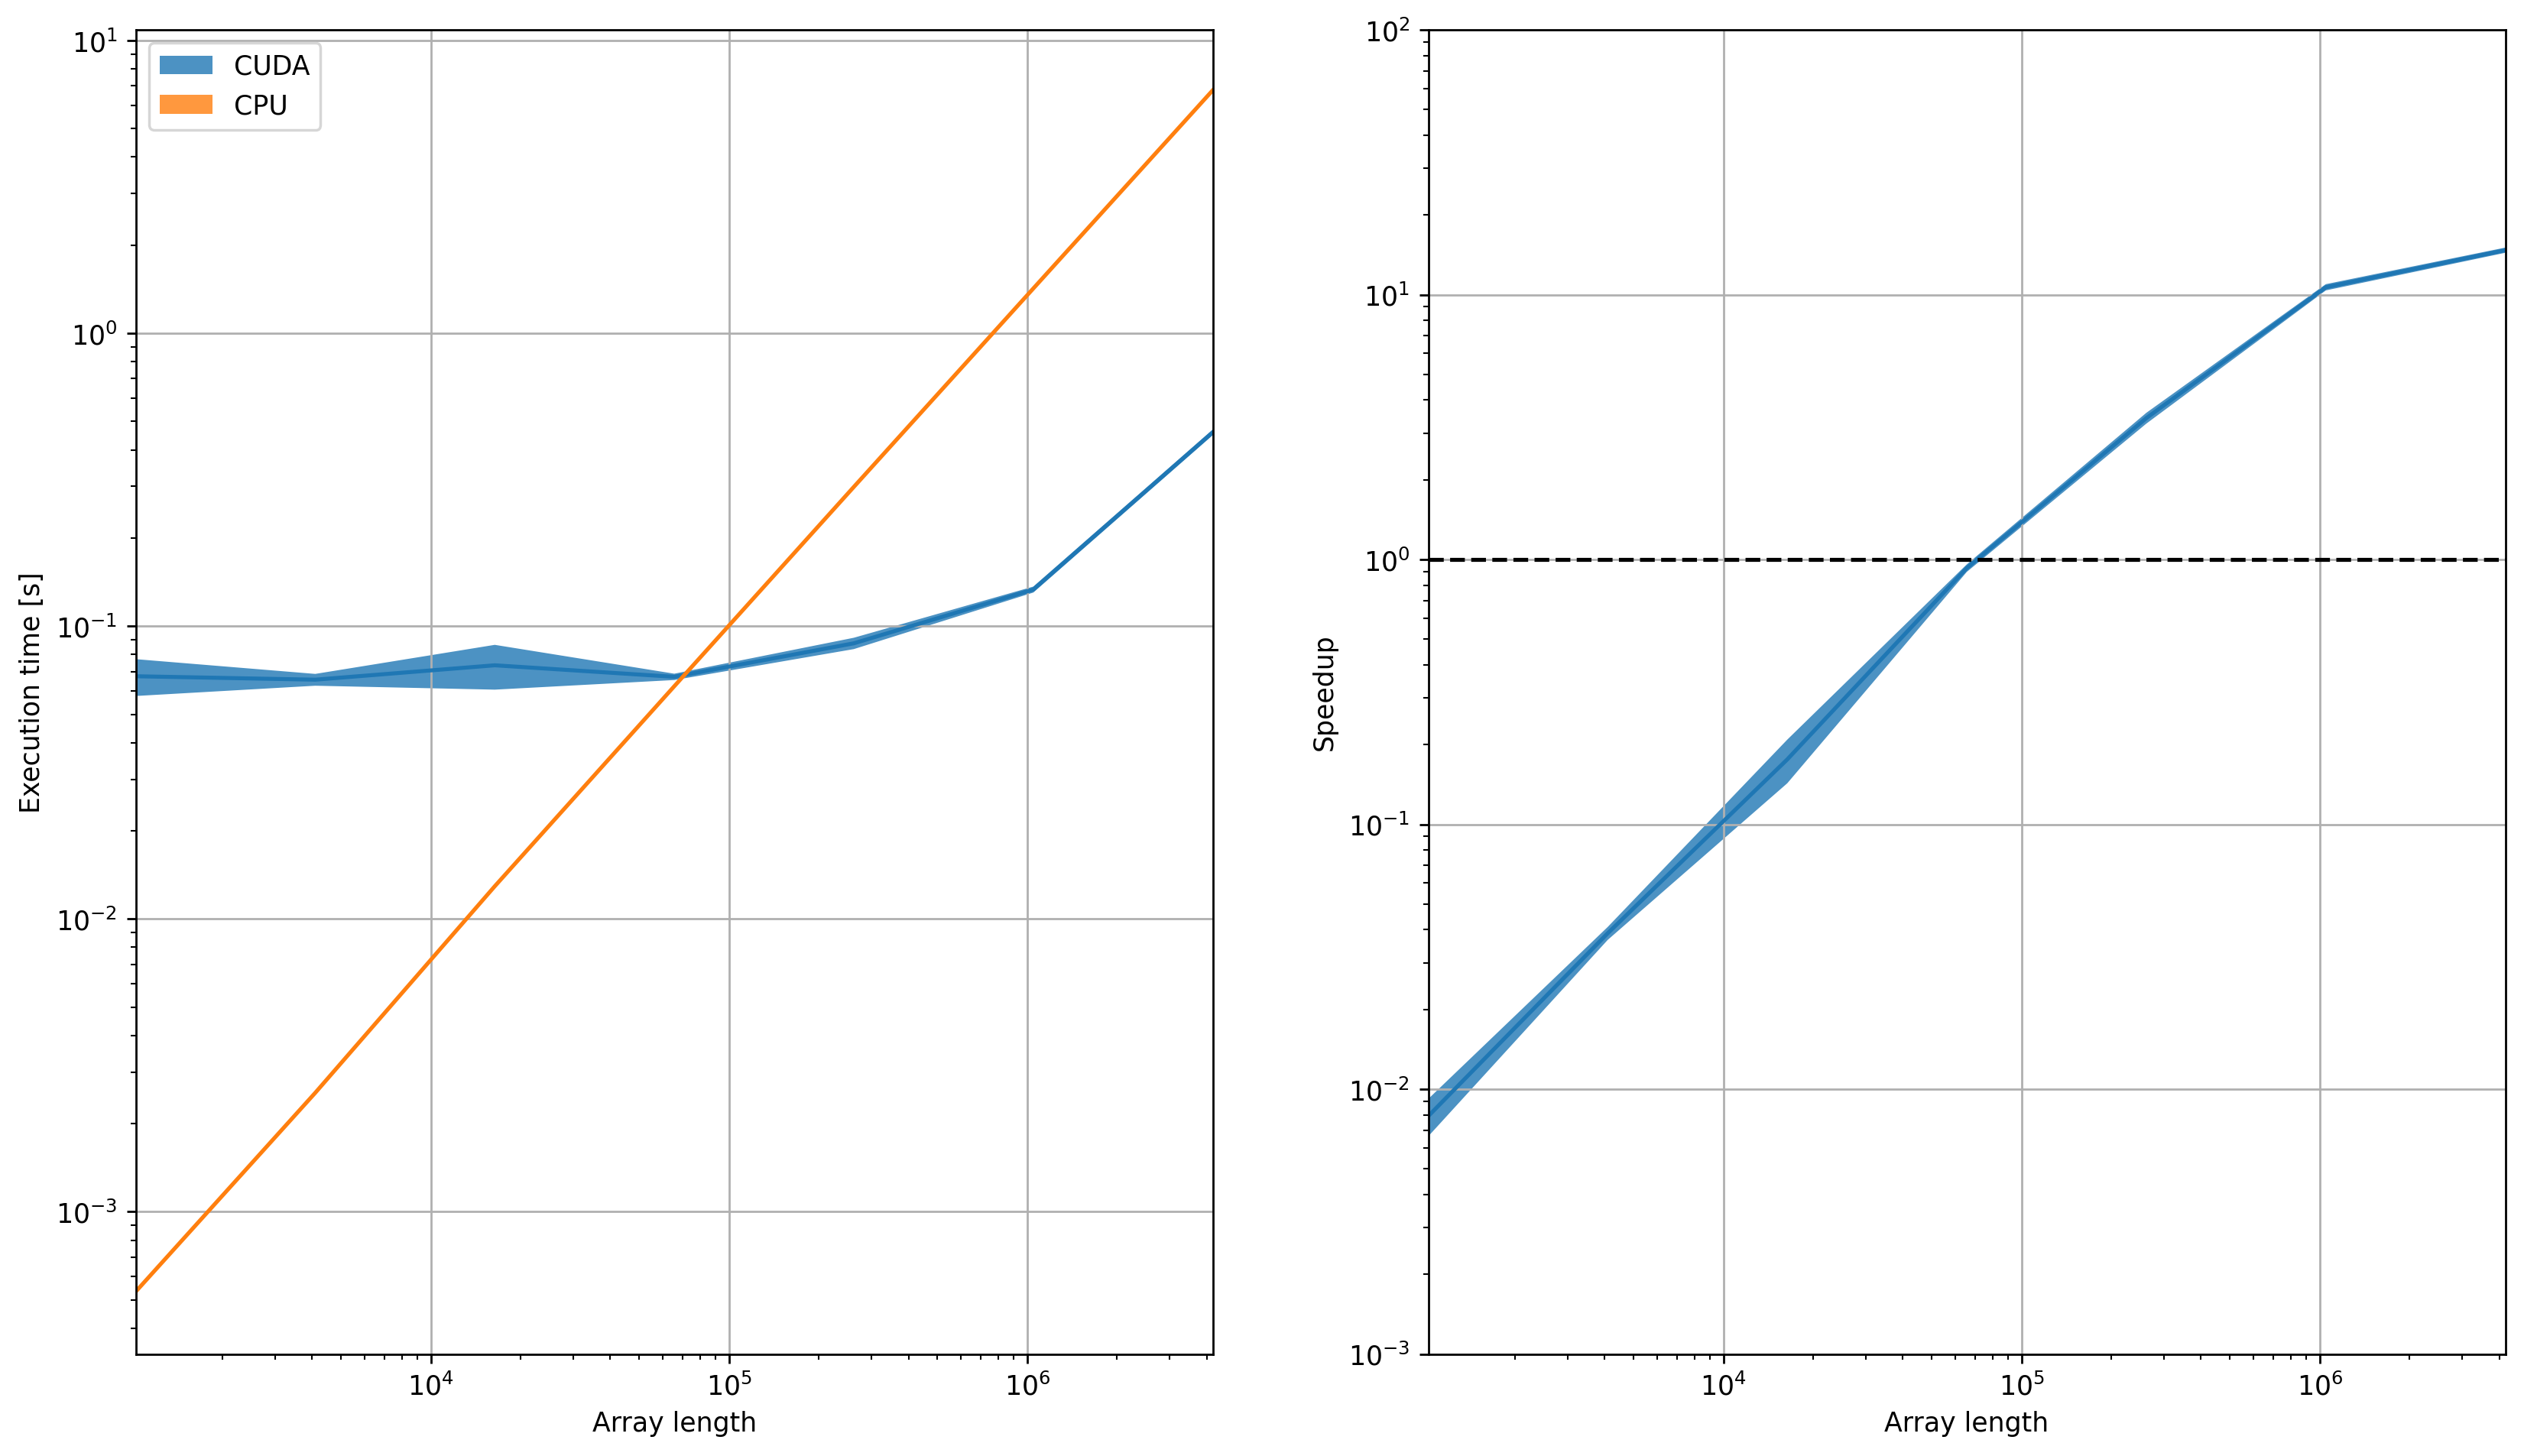

In [33]:
fig = plt.figure(figsize=(16,9), dpi=250)

ax = plt.subplot(1,2,1)
ax.plot(arraySize, cuda_time)
ax.fill_between(arraySize, cuda_time+cuda_time_std, 
                cuda_time-cuda_time_std, alpha=0.8, 
                label='CUDA')
ax.plot(arraySize, cpu_time)
ax.fill_between(arraySize, cpu_time+cpu_time_std, 
                cpu_time-cpu_time_std, alpha=0.8, 
                label='CPU')
ax.legend()
ax.grid()
ax.set_xlim(arraySize.min(), arraySize.max())
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Array length')
ax.set_ylabel('Execution time [s]')

ax = plt.subplot(1,2,2)
ax.plot(arraySize, su)
ax.fill_between(arraySize, su+su_std, 
                su-su_std, alpha=0.8)
ax.axhline(y=1, linestyle='--', color='black')
ax.grid()
ax.set_xlim(arraySize.min(), arraySize.max())
ax.set_ylim(1e-3, 100)
ax.set_xlabel('Array length')
ax.set_ylabel('Speedup')
ax.set_xscale('log')
ax.set_yscale('log')
fig.savefig('../fig/time_speedup.png')

In [34]:
su, su_std

(array([7.91336819e-03, 3.88258095e-02, 1.75955178e-01, 9.28677625e-01,
        3.42050335e+00, 1.06720791e+01, 1.47335626e+01]),
 array([0.00127619, 0.00218117, 0.03297299, 0.03038877, 0.16034596,
        0.28954668, 0.33308554]))

In [53]:
print(cpu_df["time"][::5].to_string(index=False))

0.000531
0.002504
0.012777
0.062848
0.300047
1.422680
6.767140
